# Oasis Infobyte (Data Science)

## Vineetha C

## TASK 1

#### Build a machine learning model to classify iris flowers into three species (setosa, versicolor, virginica) based on their measurements.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages to create training models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings(action='ignore')

# Iris Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration

In [3]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [10]:
types = df.Species.unique()
print(types)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
print("The number of iris flowers of setosa species is ", len(df[df['Species'] == 'Iris-setosa']))
print("The number of iris flowers of versicolor species is ", len(df[df['Species'] == 'Iris-versicolor']))
print("The number of iris flowers of virginica species is ", len(df[df['Species'] == 'Iris-virginica']))

The number of iris flowers of setosa species is  50
The number of iris flowers of versicolor species is  50
The number of iris flowers of virginica species is  50


# Data Visualization

### Heatmap / Corelation matrix

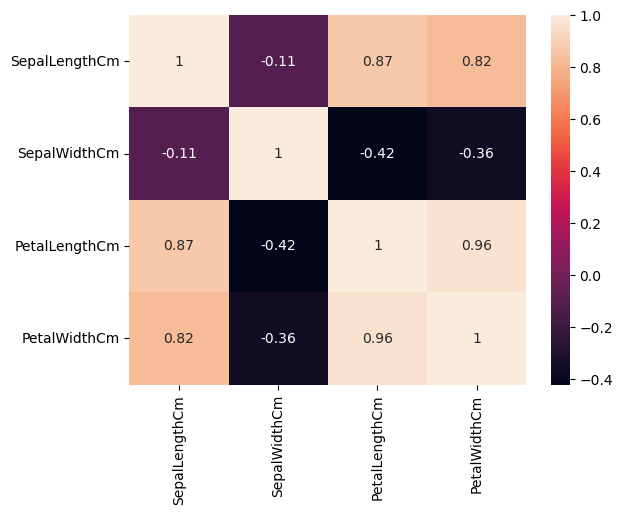

In [12]:
sns.heatmap(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), annot = True)
plt.show()

### Histograms

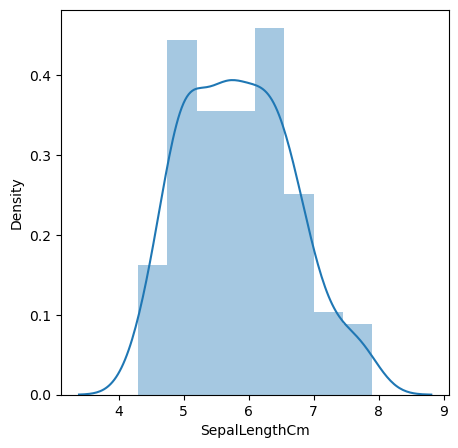

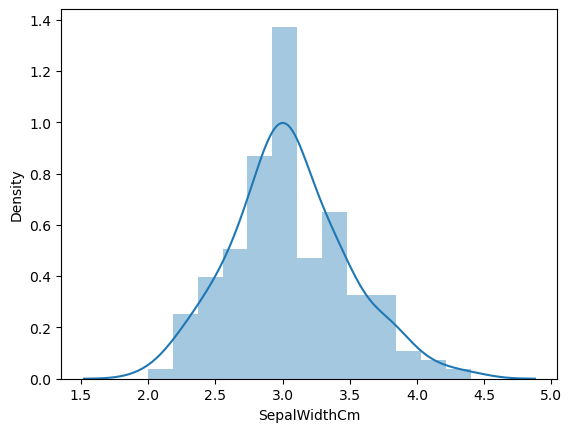

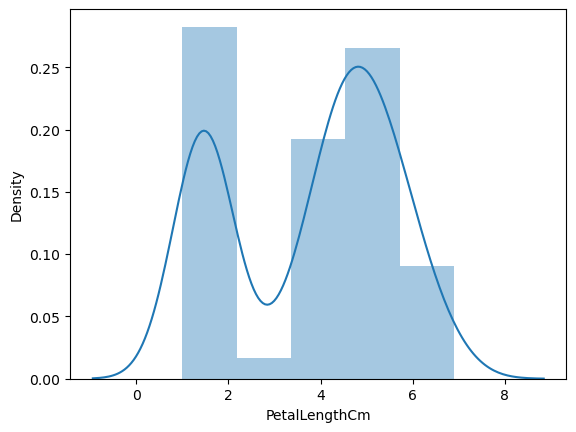

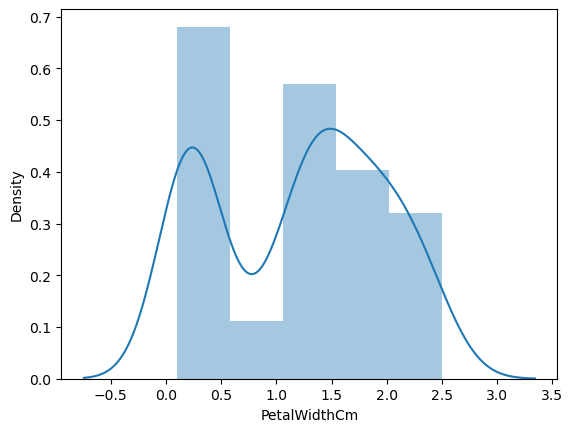

In [13]:
plt.figure(figsize = (5, 5))

for i in data.columns:
    sns.distplot(df[i])
    plt.show()

### Pie Chart

In [14]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

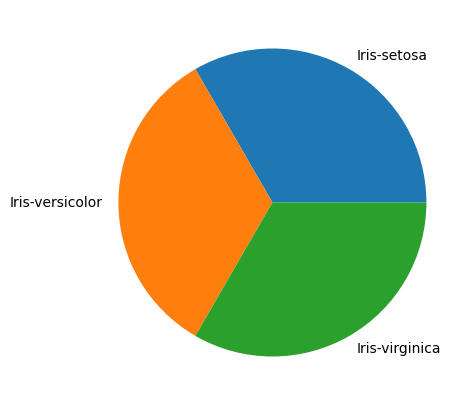

In [15]:
plt.figure(figsize = (5, 5))

plt.pie([50, 50, 50], labels = types)
plt.show()

# Training the models

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### 1) Logistic Regression

#### Model

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

#### Prediction of target variable

In [18]:
y_pred = logreg.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']


#### Confusion matrix and Classification report

In [19]:
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [20]:
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Accuracy of model

In [21]:
acc_log = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model:',  acc_log * 100, "%")

Accuracy of Logistic Regression model: 100.0 %


### 2) K Nearest Neighbors Classifier

#### Model

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Prediction of target variable

In [23]:
y_pred = knn.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']


#### Confusion matrix and Classification report

In [24]:
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [25]:
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Accuracy of model

In [26]:
acc_knn = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model:', acc_knn * 100, "%")

Accuracy of Logistic Regression model: 100.0 %


### 3) Decision Tree Classifier

#### Model

In [27]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Prediction of target variable

In [28]:
y_pred = tree.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']


#### Confusion matrix and Classification report

In [29]:
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [30]:
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Accuracy of model

In [31]:
acc_tree = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model:', acc_tree * 100, "%")

Accuracy of Logistic Regression model: 100.0 %


### 4) Gaussian Naive Bayes

#### Model

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Prediction of target variable

In [33]:
y_pred = gnb.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']


#### Confusion matrix and Classification report

In [34]:
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [35]:
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Accuracy of model

In [36]:
acc_gnb = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model:', acc_gnb * 100, "%")

Accuracy of Logistic Regression model: 100.0 %


### 5) Support Vector Machine

#### Model

In [37]:
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

#### Prediction of target variable

In [38]:
y_pred = svc.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']


#### Confusion matrix and Classification report

In [39]:
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [40]:
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Accuracy of model

In [41]:
acc_svm = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model:', acc_svm * 100, "%")

Accuracy of Logistic Regression model: 100.0 %


# Overall accuracy scores (of all models):

In [42]:
scores = pd.DataFrame({
    'Model name': ['Logistic Regression', 'K Nearest Neighbors Classifier (KNN)', 'Decision Tree Classifier', 'Gaussian Naive Bayes', 'Support Vector Machine (SVM)'],
    'Accuracy score': [acc_log, acc_knn, acc_tree, acc_gnb, acc_svm]})

results = scores.sort_values(by = 'Accuracy score', ascending = False)
results = results.set_index('Model name')
results

,Accuracy score
Model name,
Logistic Regression,1.0
K Nearest Neighbors Classifier (KNN),1.0
Decision Tree Classifier,1.0
Gaussian Naive Bayes,1.0
Support Vector Machine (SVM),1.0
